# HW6_Assignment_1_Building Energy - akp418

In [239]:
#1: All Imports

from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import StringIO
import requests
import zipfile
import urllib2
import matplotlib.pyplot as plt
import plotly.plotly as py
import statsmodels.api as sm
import statsmodels.formula.api as smf    # for OLS regression

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [240]:
#2 : Downloading and reading nrg.csv Dataset

nrg = pd.read_csv(os.getenv("PUIDATA") + "/" + 'nrg.csv')
nrg.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [241]:
#3 : Downloading and reading MAPPluto Data set

a = requests.get("http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip") 
b = zipfile.ZipFile(StringIO.StringIO(a.content))
c = b.extractall(os.getenv("PUIDATA"))
bsize = gp.read_file(os.getenv("PUIDATA") + "/" + "MNMapPLUTO.shp")
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [242]:
#4 : Columns in nrg dataset
nrg.columns

Index([u'Record Number', u'NYC Borough, Block, and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [243]:
#4 : Column in MapPluto dataset
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb848659f90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb84fae8ed0>]], dtype=object)

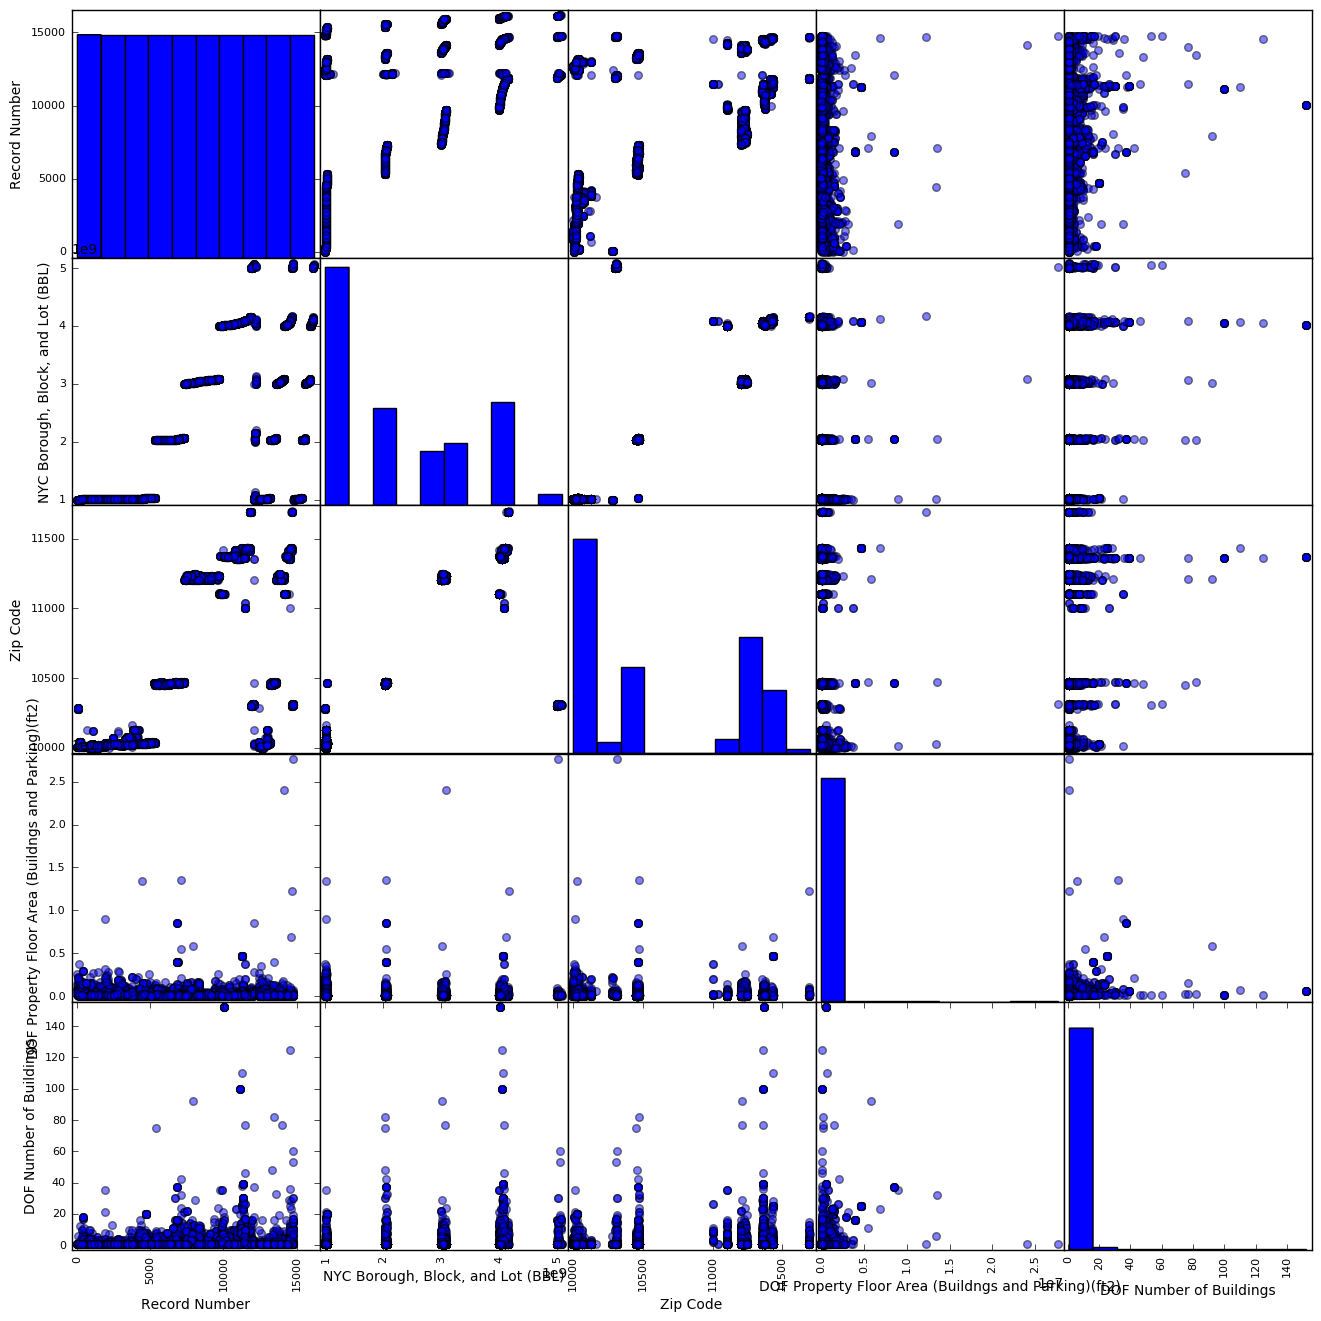

In [244]:
#5 : Trying to make a Scatter Matrix Plot

from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=121, figsize=(16, 16))

In [245]:
#6_1 : Data Cleanup/Wrangling

nrg = nrg[nrg['Borough'] == 'Manhattan']  # Filtering Manhattan Data

# Dropping Unnecessary columns ()

nrg_2 = nrg.drop(['Record Number', \
                  'Co-reported BBL Status', \
                  'BBLs Co-reported', \
                  'Reported NYC Building Identificaiton Numbers (BINs)', \
                  'Street Number', \
                  'Street Name', \
                  'Borough', \
                  'Zip Code', \
                  'DOF Benchmarking Submission Status', \
                  'Weather Normalized Site EUI(kBtu/ft2)', \
                  'Source EUI(kBtu/ft2)', \
                  'Weather Normalized Source EUI(kBtu/ft2)', \
                  'Municipally Supplied Potable Water - Indoor Intensity (gal/ft\xc2\xb2)', \
                  'Automatic Water Benchmarking Eligible', \
                  'Reported Water Method', \
                  'ENERGY STAR Score', \
                  'Total GHG Emissions(MtCO2e)', \
                  'Direct GHG Emissions(MtCO2e)', \
                  'Indirect GHG Emissions(MtCO2e)', \
                  'DOF Property Floor Area (Buildngs and Parking)(ft2)', \
                  'Primary Property Type - Self Selected', \
                  'DOF Number of Buildings'], 1) 

len(nrg_2)

6721

In [246]:
#6_2 : Vectorizing the Data

def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

col1 = np.vectorize(canconvert)(nrg_2['NYC Borough, Block, and Lot (BBL)'])
col2 = np.vectorize(canconvert)(nrg_2['Site EUI(kBtu/ft2)'])
col3 = np.vectorize(canconvert)(nrg_2['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'])

nrg_2['NYC Borough, Block, and Lot (BBL)'][~col1] = float('NaN')
nrg_2['Site EUI(kBtu/ft2)'][~col2] = float('NaN')
nrg_2['Reported Property Floor Area (Building(s)) (ft\xc2\xb2)'][~col3] = float('NaN')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [247]:
#Consistency Check_1

print(nrg_2['Site EUI(kBtu/ft2)'].astype(float).head())

0       NaN
3       NaN
15      NaN
16    125.4
18      NaN
Name: Site EUI(kBtu/ft2), dtype: float64


In [248]:
#Consistency Check_2

print (nrg_2['Site EUI(kBtu/ft2)'].astype(float).head())

0       NaN
3       NaN
15      NaN
16    125.4
18      NaN
Name: Site EUI(kBtu/ft2), dtype: float64


In [249]:
#Consistency Check_3 _ Map_pluto Data

bsize.BBL.astype(float).head()

0    1.015450e+09
1    1.007238e+09
2    1.016800e+09
3    1.013850e+09
4    1.011970e+09
Name: BBL, dtype: float64

In [250]:
#7_1 : Merging the nrg & MapPluto Datasets

#Preparing the nrg dataset

nrg_2.rename(columns = {'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace = True)
nrg_2.rename(columns = {'Reported Property Floor Area (Building(s)) (ft²)': 'Area'}, inplace = True)
nrg_2.rename(columns = {'Site EUI(kBtu/ft2)': 'Energy/Area'}, inplace = True)
nrg_2['Energy/Area'] = nrg_2['Energy/Area'].astype(float)
nrg_2['Area'] = nrg_2['Area'].astype(float)
nrg_2['Energy_Consumption'] = nrg_2['Energy/Area'] * nrg_2['Area']
nrg_2.head()

,BBL,Energy/Area,Area,Energy_Consumption
0,1.000410e+09,NaN,918919.0,NaN
3,1.006700e+09,NaN,NaN,NaN
15,1.004370e+09,NaN,NaN,NaN
16,1.013110e+09,125.4,330000.0,41382000.0
18,1.006460e+09,NaN,69160.0,NaN


In [251]:
#7_2 : Merging the nrg & MapPluto Datasets

#Preparing the Pluto Dataset

bsize_2 = pd.DataFrame()
bsize_2['BBL'] = bsize['BBL']
bsize_2['Total_Units'] = bsize['UnitsTotal']
bsize_2.head()

,BBL,Total_Units
0,1.015450e+09,18
1,1.007238e+09,50
2,1.016800e+09,10
3,1.013850e+09,32
4,1.011970e+09,26


In [252]:
#7_3 : Merging the nrg & MapPluto Datasets

#Merging the Datasets using inner merge

new_nrg = pd.merge(nrg_2, bsize_2, how='inner', on='BBL')
len(new_nrg)

6492

In [253]:
#7_4 : Cleaning the Data After Merge

new_nrg.dropna(inplace = True)
len(new_nrg)

5069

In [254]:
#7_5 : Further Cleaning
new_nrg_cut = new_nrg[new_nrg['Energy_Consumption']>1000]
new_nrg_cut = new_nrg_cut[new_nrg_cut['Total_Units']<5000]
new_nrg_cut = new_nrg_cut[new_nrg_cut['Total_Units']>0]
len(new_nrg_cut)

4994

In [255]:
#Clean Dataset

new_nrg_cut.head()

,BBL,Energy/Area,Area,Energy_Consumption,Total_Units
2,1.013110e+09,125.4,330000.0,41382000.0,56
10,1.010140e+09,154.9,841709.0,130380724.1,2
15,1.007660e+09,122.3,59468.0,7272936.4,8
16,1.008150e+09,117.0,364000.0,42588000.0,24
18,1.005050e+09,82.1,235370.0,19323877.0,24


# #  Start the Plotting Here

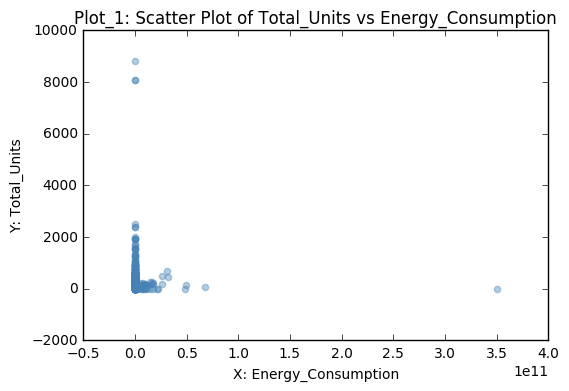

In [256]:
#8_1 : First Plot - Scatter Plot between No: of Units & Energy_Consumtion - Using new_nrg Dataset before filtering

x_1 = new_nrg['Energy_Consumption']
y_1 = new_nrg['Total_Units']

#plot
plt.scatter(x_1, y_1, color='SteelBlue', alpha=.4)
#labels
plt.title("Plot_1: Scatter Plot of Total_Units vs Energy_Consumption")
plt.xlabel("X: Energy_Consumption", fontsize=10)
plt.ylabel("Y: Total_Units", fontsize=10)

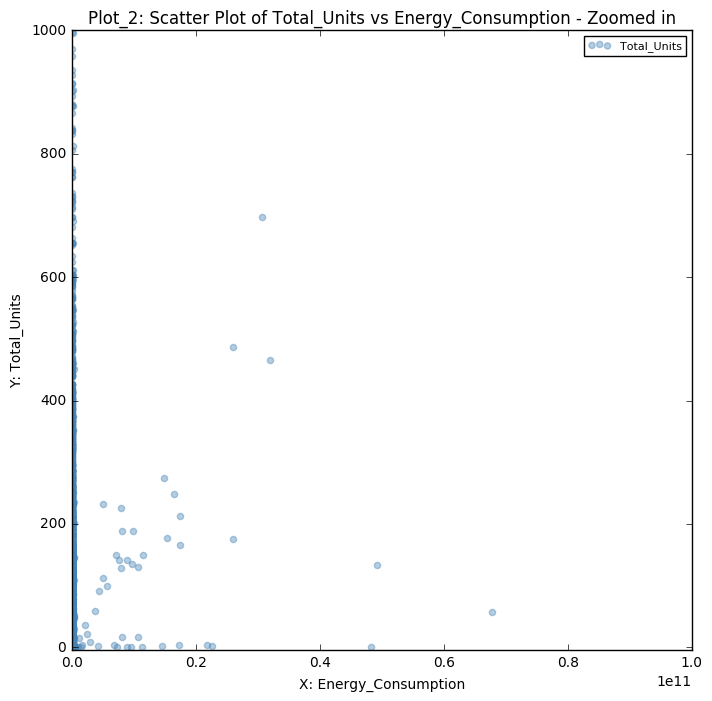

In [257]:
#8_2 : Second Plot - Scatter Plot between No: of Units & Energy_Consumtion - Zoomed in


x_2 = new_nrg['Energy_Consumption']
y_2 = new_nrg['Total_Units']

plt.figure(figsize=(8,8))

#axis limits
plt.axis([-5, 1e11, -5, 1000])

#plot
plt.scatter(x_2, y_2, color='SteelBlue', alpha=.4)
#labels
plt.title("Plot_2: Scatter Plot of Total_Units vs Energy_Consumption - Zoomed in")
plt.xlabel("X: Energy_Consumption", fontsize=10)
plt.ylabel("Y: Total_Units", fontsize=10)
plt.legend(fontsize=8)

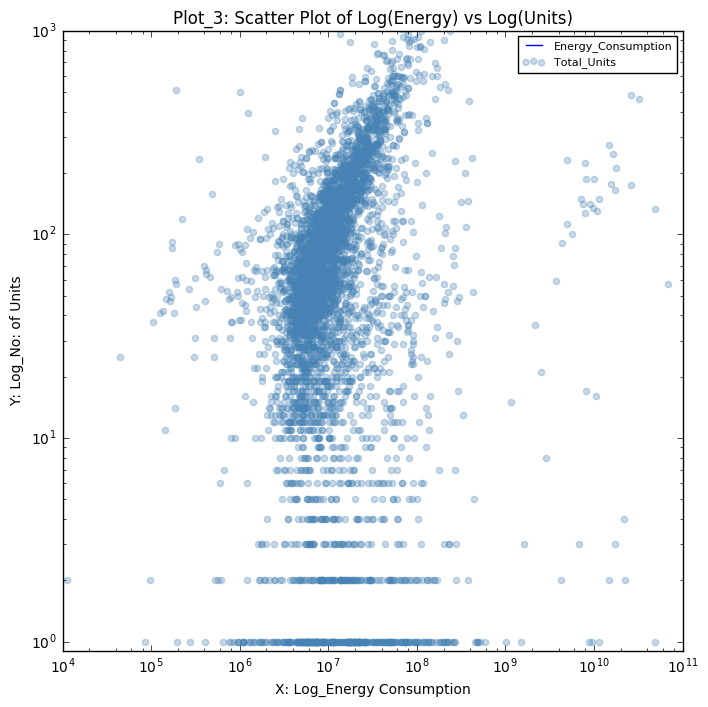

In [258]:
#8_3 : Log Plot - Scatter Plot between No: of Units & Energy_Consumtion

x_3 = new_nrg['Energy_Consumption']
y_3 = new_nrg['Total_Units']

#plot
 
plt.figure(figsize=(8,8))
plt.loglog(y_3 , x_3)
plt.scatter(x_3, y_3, color='SteelBlue', alpha=.3)
#axis limits
plt.axis([1e4, 1e11, 0, 1000])
#labels
plt.title("Plot_3: Scatter Plot of Log(Energy) vs Log(Units)")
plt.xlabel("X: Log_Energy Consumption", fontsize=10)
plt.ylabel("Y: Log_No: of Units", fontsize=10)
plt.legend(fontsize=8)


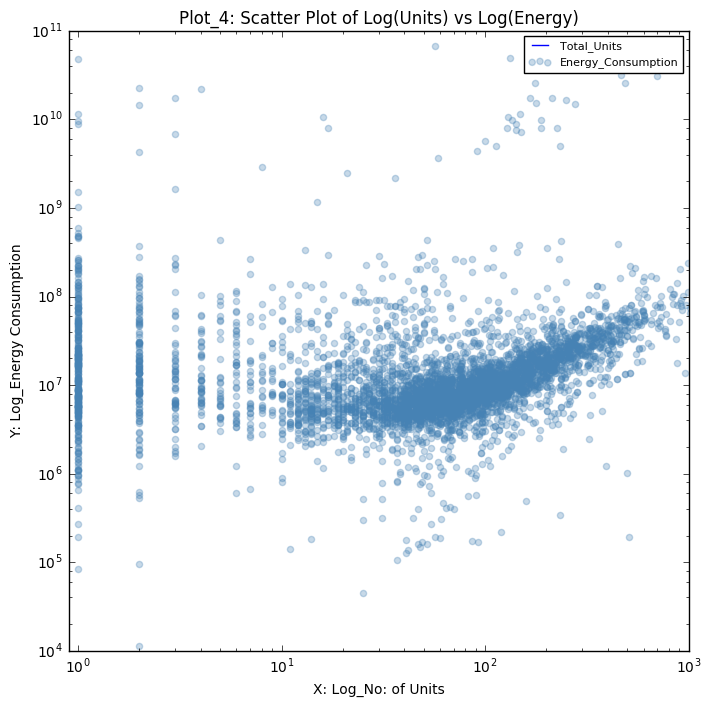

In [259]:
#8_4 : Log Plot - Scatter Plot between Energy_Consumtion & No: of Units

x_4 = new_nrg['Total_Units']
y_4 = new_nrg['Energy_Consumption']

#plot
 
plt.figure(figsize=(8,8))
plt.loglog(y_4 , x_4)
plt.scatter(x_4, y_4, color='SteelBlue', alpha=.3)
#axis limits
plt.axis([0, 1000, 1e4, 1e11])
#labels
plt.title("Plot_4: Scatter Plot of Log(Units) vs Log(Energy)")
plt.xlabel("X: Log_No: of Units", fontsize=10)
plt.ylabel("Y: Log_Energy Consumption", fontsize=10)
plt.legend(fontsize=8)



# Curve Fitting from here

In [260]:
#Current state of Dataset

new_nrg_cut.head()

,BBL,Energy/Area,Area,Energy_Consumption,Total_Units
2,1.013110e+09,125.4,330000.0,41382000.0,56
10,1.010140e+09,154.9,841709.0,130380724.1,2
15,1.007660e+09,122.3,59468.0,7272936.4,8
16,1.008150e+09,117.0,364000.0,42588000.0,24
18,1.005050e+09,82.1,235370.0,19323877.0,24


In [261]:
#7_5 : Data Maipulation for Curve Fitting

new_nrg_cut['Log_Energy_Consumption'] = np.log10(new_nrg_cut["Energy_Consumption"])
new_nrg_cut['Log_Total_Units'] = np.log10(new_nrg_cut["Total_Units"])
new_nrg_cut = new_nrg_cut[new_nrg_cut['Log_Energy_Consumption']>1]
new_nrg_cut = new_nrg_cut[new_nrg_cut['Log_Total_Units']>1]
new_nrg_cut.dropna(inplace = True)
new_nrg_cut.head()

,BBL,Energy/Area,Area,Energy_Consumption,Total_Units,Log_Energy_Consumption,Log_Total_Units
2,1.013110e+09,125.4,330000.0,41382000.0,56,7.616811,1.748188
16,1.008150e+09,117.0,364000.0,42588000.0,24,7.629287,1.380211
18,1.005050e+09,82.1,235370.0,19323877.0,24,7.286094,1.380211
19,1.021420e+09,137.7,64806.0,8923786.2,62,6.950549,1.792392
20,1.021750e+09,103.2,62839.0,6484984.8,85,6.811909,1.929419


In [262]:
len(new_nrg_cut)

4263

In [263]:
#9_1 : Plot: 5 - Linear Curve fitting into the Log Plot

x_5a = new_nrg_cut['Log_Energy_Consumption']
x_5b = sm.add_constant(x_5a)
y_5 = new_nrg_cut['Log_Total_Units']

In [264]:
linmodel_5 = sm.OLS(y_5, x_5b, missing='drop').fit()
linmodel_5.summary

<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7fb84bfe4190>>

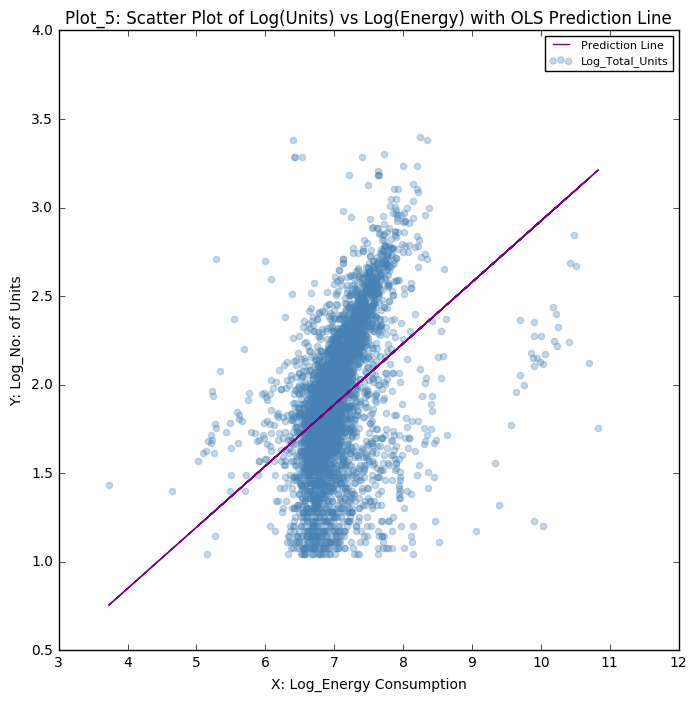

In [265]:
plt.figure(figsize=(8,8))
plt.scatter(x_5a, y_5, color='SteelBlue', alpha=.3)
plt.plot(x_5a, linmodel_5.predict(x_5b), color='Purple', label='Prediction Line')
plt.title("Plot_5: Scatter Plot of Log(Units) vs Log(Energy) with OLS Prediction Line")
plt.xlabel("X: Log_Energy Consumption", fontsize=10)
plt.ylabel("Y: Log_No: of Units", fontsize=10)
plt.legend(fontsize=8)

In [266]:
#9_2 : Plot: 6 - Linear Curve fitting into the Log Plot

x_6a = new_nrg_cut['Log_Total_Units']
x_6b = sm.add_constant(x_6a)
y_6 = new_nrg_cut['Log_Energy_Consumption']

In [267]:
linmodel_6 = sm.OLS(y_6, x_6b, missing='drop').fit()
linmodel_6.summary

<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7fb8485f3350>>

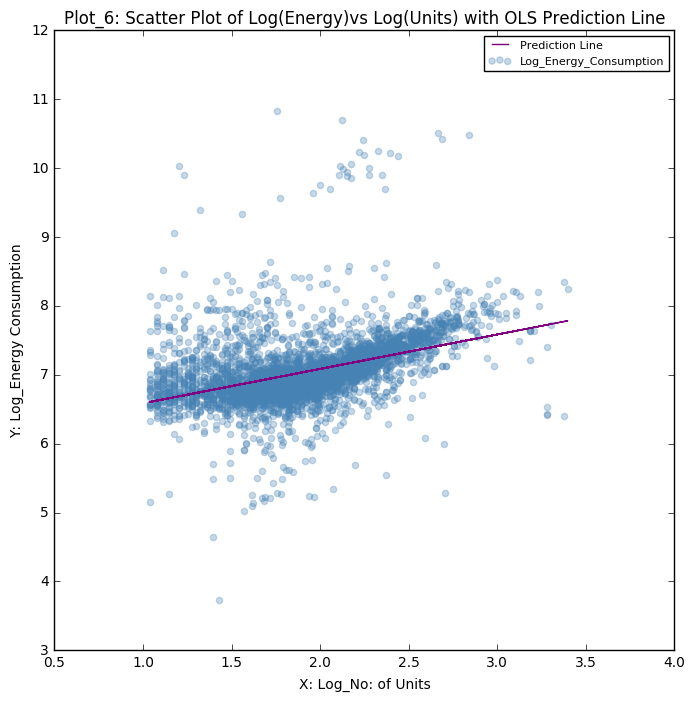

In [268]:
plt.figure(figsize=(8,8))
plt.scatter(x_6a, y_6, color='SteelBlue', alpha=.3)
plt.plot(x_6a, linmodel_6.predict(x_6b), color='Purple', label='Prediction Line')
plt.title("Plot_6: Scatter Plot of Log(Energy)vs Log(Units) with OLS Prediction Line")
plt.xlabel("X: Log_No: of Units", fontsize=10)
plt.ylabel("Y: Log_Energy Consumption", fontsize=10)
plt.legend(fontsize=8)

# Chi-Square Test

In [269]:
#9_3 : Determining the better fit by calculating the chi square

chisq_5 = ((linmodel_5.predict(x_5b) - new_nrg_cut['Log_Total_Units'])**2/(np.sqrt(new_nrg_cut['Log_Total_Units']))**2).sum()

print("Chisq for Plot_5 Regression Line = ", str(chisq_5))

chisq_6 = ((linmodel_6.predict(x_6b) - new_nrg_cut['Log_Energy_Consumption'])**2/(np.sqrt(new_nrg_cut['Log_Energy_Consumption']))**2).sum()

print("Chisq for Plot_6 Regression Line= ", str(chisq_6))

Chisq for Plot_5 Regression Line =  345.440908242
Chisq for Plot_6 Regression Line=  109.935142512


In [270]:
#Since chisq_5 < chisq_6, the Regression Line in Plot_6 fits the data better.

In [271]:
#7_6 : Data Maipulation for 2nd degree Curve Fitting

new_nrg_cut['Sq_Log_Energy_Consumption'] = (new_nrg_cut['Log_Energy_Consumption'])**2
new_nrg_cut['Sq_Log_Total_Units'] = (new_nrg_cut['Log_Total_Units'])**2
new_nrg_cut.head()

,BBL,Energy/Area,Area,Energy_Consumption,Total_Units,Log_Energy_Consumption,Log_Total_Units,Sq_Log_Energy_Consumption,Sq_Log_Total_Units
2,1.013110e+09,125.4,330000.0,41382000.0,56,7.616811,1.748188,58.015817,3.056161
16,1.008150e+09,117.0,364000.0,42588000.0,24,7.629287,1.380211,58.206024,1.904983
18,1.005050e+09,82.1,235370.0,19323877.0,24,7.286094,1.380211,53.087170,1.904983
19,1.021420e+09,137.7,64806.0,8923786.2,62,6.950549,1.792392,48.310134,3.212668
20,1.021750e+09,103.2,62839.0,6484984.8,85,6.811909,1.929419,46.402104,3.722657


# 2nd Degree Polynomial

In [272]:
#9_4 : Fit a 2nd degree polynomial for the data:

x_7 = new_nrg_cut['Log_Energy_Consumption']
y_7 = new_nrg_cut['Log_Total_Units']

In [273]:
poly_7 = smf.ols(formula='Log_Total_Units ~ Log_Energy_Consumption + Sq_Log_Energy_Consumption', data=new_nrg_cut).fit()
poly_7.summary

<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7fb84fdc89d0>>

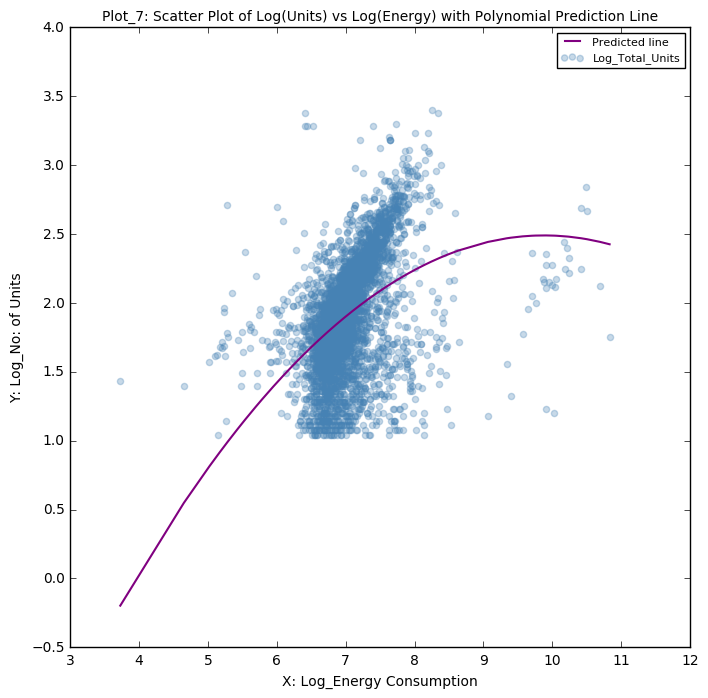

In [274]:
plt.figure(figsize=(8,8))
plt.scatter(x_7, y_7, color='SteelBlue', alpha=.3)

poly_7_pred = poly_7.predict(new_nrg_cut.sort_values('Log_Energy_Consumption'))
plt.plot((sort(new_nrg_cut.Log_Energy_Consumption)), poly_7_pred, c = 'purple', lw = 1.5, label='Predicted line')

#plt.plot(x_7, poly_7.predict(Log_Energy_Consumption), color='Purple', label='Prediction Line')
plt.title("Plot_7: Scatter Plot of Log(Units) vs Log(Energy) with Polynomial Prediction Line", fontsize=10)
plt.xlabel("X: Log_Energy Consumption", fontsize=10)
plt.ylabel("Y: Log_No: of Units", fontsize=10)
plt.legend(fontsize=8)

In [275]:
#9_5 : Fit a 2nd degree polynomial for the data:

x_8 = new_nrg_cut['Log_Total_Units']
y_8 = new_nrg_cut['Log_Energy_Consumption']

In [276]:
poly_8 = smf.ols(formula='Log_Energy_Consumption ~ Log_Total_Units + Sq_Log_Total_Units', data=new_nrg_cut).fit()
poly_8.summary

<bound method OLSResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7fb84bb5b5d0>>

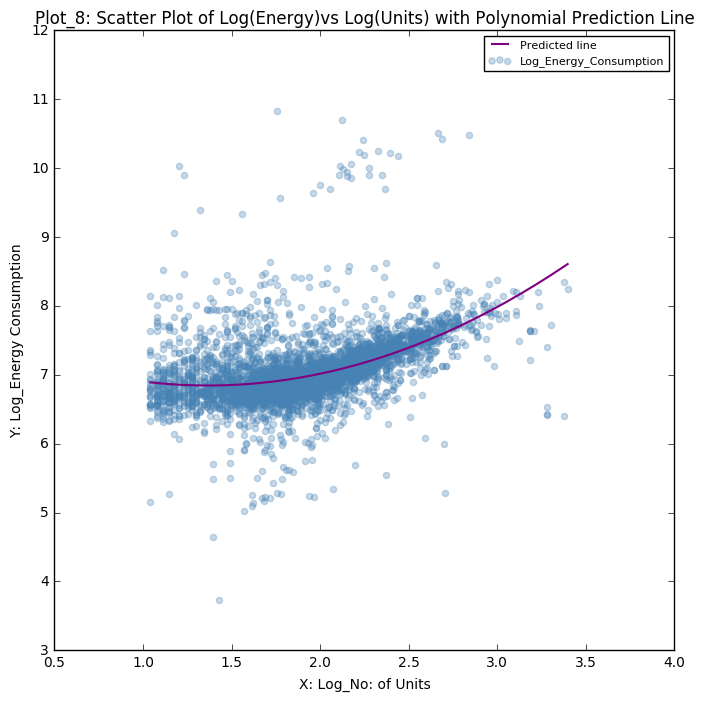

In [277]:
plt.figure(figsize=(8,8))
plt.scatter(x_8a, y_8, color='SteelBlue', alpha=.3)

poly_8_pred = poly_8.predict(new_nrg_cut.sort_values('Log_Total_Units'))
plt.plot((sort(new_nrg_cut.Log_Total_Units)), poly_8_pred, c = 'purple', lw = 1.5, label='Predicted line')

plt.title("Plot_8: Scatter Plot of Log(Energy)vs Log(Units) with Polynomial Prediction Line")
plt.xlabel("X: Log_No: of Units", fontsize=10)
plt.ylabel("Y: Log_Energy Consumption", fontsize=10)
plt.legend(fontsize=8)

In [278]:
#Comment on Plot_7 & Plot_8 : Prediction Line in Plot_8 fits the data better than the Prediction Line in Plot_7

In [279]:
#Comparing the Linear Model & the Curve Model

print ("LR : ", -2 * (-linmodel_6.llf - (-poly_8.llf)))
print ("LR from statsmodels:", poly_8.compare_lr_test(linmodel_6))

LR :  -220.629525367
LR from statsmodels: (220.62952536651846, 6.5927852373289776e-50, 1.0)
